# OpenStreetMap: Auditing_Cleaning_Analysing

## Map Area --> Mumbai, India
-----------------------------------------------------------------------------------------------------------------------------

Lies on the west cost of India, Mumbai city is the capital of Maharashtra. Previously known as Bombay, not only it is India's largest city, but also, one of the world's largest and most densely populated areas. Mumbai, a cosmopolitan metropolis, is one of the most prosperous cities in India and is making a significant contribution to the economic development of the country. It has the enormous potential to cater to the tourism of the nation.

Besides the above points, I chose to analyse map dataset of Mumbai city because it is place of my maternal house. I have been there many times and visited many places. So, there is a personal interest to contribute in the improvement of this particular dataset.



> [OpenStreetMap of Mumbai](https://www.openstreetmap.org/search?query=mumbai#map=11/18.8748/73.0563)<br>
> [Custom Extract](https://mapzen.com/data/metro-extracts/your-extracts/02d49b5ccdf9)<br>
> [Metro Extract](https://mapzen.com/data/metro-extracts)

## Findings of auditing 
--------------------------------------------------------------------------------------------------------------------------

- **Inconsistent postcodes :** A proper postcode of Mumbai conventionally consists of 6 numeric digits. However, it is found that few of them do not follow this convention. Also, few of these had a whitespace in the middle, unlike others.

- **Abbreviated street name :** Following are the observations:
                                 1. "Road" was abbreviated as 'Rd'
                                 2. "Society" was abbreviated as 'Soc.'
                                 3. "Building was abbreviated as 'bld.'"
                                 4. "Colony" was mispelled as 'Coloney'
                                 
- **Language specification in 2-letter code :** The name *Mumbai* is specified in different languages. These languages are written in 2-letter code.*For example:'es' for Spanish and and 'mr' for Marathi*. I found it too difficult to recognize the language in which the name was written.

- **Unrealistic names of places :** Few names of places were over-abbreviated or they were too weird to be names. 
-----------------------------------------------------------------------------------------------------------------------------

                          

## Cleaning  the problems encountered in map
---------------------------

- **Cleaning Postcodes:**

Two inaccurate formats are found in post codes.
   1. Incorrect postcodes, not exactly a 6 digit code.
   2. Whitespace in the center of few postcodes.
 

``` python
    def update_postcode(tag):
    if tag == '40049':                                       #replace by correct postcodes 
        return '400049'
    elif tag == '4000072':
        return '400072'
    elif tag == '40058':
        return '400058'
    elif tag == '40076':
        return '400076'
    elif tag == '40001':
        return '400001'
    elif tag == '123':
        return '400089' 
    elif tag == '48147':
        return '400054'
    else: 
        return tag.replace(" ","")                           #replace whitespace (" ") with empty string ("")     
```
With the help of update_postcode() method, the suspicious and incorrect postcodes have been replaced by the verified postcodes to maintain the uniformity of the data. 

The correct postcodes have been searched and verified manually.



----------

- ** Cleaning street names**

The abbreviated street names are cleaned by using the update_name() funtion.

```python
def update_name(name, mapping): # 'name' is the name of place to be cleaned
    m = street_type_re.search(name)
    if m:
        if m.group() not in expected:                          
        # expected = ["Street", "Lane", "Road", "Nagar", "Marg", "Colony", "Society", "Residency", "Building"] 
            if m.group() in mapping.keys():
                name = re.sub(m.group(), mapping[m.group()], name)
    return name      #returns cleaned name  

# 'mapping' is a dictionary where key is the abbreviated street name and value is its corrected form.


```
*Result of cleaning*   

**"Ashok Guru Prasad Soc."**
> "Ashok Guru Prasad Society"

**"Jitendra Rd":**
>"Jitendra Road"
                
-------

- ** Cleaning language specification **

The following function is used to convert 2-letter code into 3-letter code to recognize natural languages for better understanding.
``` python
def keyname(element):                              # tag element decribing nodes or ways
    if 'name:' in element.attrib['k']:
        language.append(element.attrib['k'])
        key_val = element.attrib['k']
        if key_val in language:
            a = key_val.split(':')                 #value of key attribute of such elements 
            if code_mapping[a[1]]:
                element.attrib['k'] = a[0]+':'+code_mapping[a[1]]
                return element.attrib['k']
                
#'code_mapping' is a dictionary where key refer to 2-letter code and value refer to 3-letter code.
```
While my research I found that both 2-letter code and 3-letter code are ISO recognized.

*Result of cleaning*

**en** for English changed to:
> eng

**es** for Spanish changed to:
> spa

**pa** for Punjabi changed to:
> pan

**sv** for Swedish changed to:
> swe

----------

- **Dealing with unrealistic names of places.**

The following code finds names of places consisting of number of characters less than 4.

In [3]:
import xml.etree.cElementTree as ET
SAMPLE_FILE = "sample_file.osm"
def names(filename):
    t=0
    for event, elem in ET.iterparse(filename):
        if elem.tag=='node' or elem.tag=='way' :
            for tag in elem.iter('tag'):
                if tag.attrib['k'] == 'name' and len(tag.attrib['v']) <=3:
                    print tag.attrib
           
names(SAMPLE_FILE)

{'k': 'name', 'v': 'K J'}
{'k': 'name', 'v': 'ccd'}
{'k': 'name', 'v': 'B5'}
{'k': 'name', 'v': 'B8'}
{'k': 'name', 'v': 'IFC'}
{'k': 'name', 'v': '15'}
{'k': 'name', 'v': '9'}
{'k': 'name', 'v': 'Pam'}
{'k': 'name', 'v': 'N1'}
{'k': 'name', 'v': 'C11'}
{'k': 'name', 'v': 'C19'}
{'k': 'name', 'v': 'C2'}
{'k': 'name', 'v': 'F-G'}
{'k': 'name', 'v': '9'}
{'k': 'name', 'v': '1'}


We can see that the value attibute contains name that do not specify any place. Some of these are numerical and alpha-numerical that does not qualifies as a *name*.
Unfortunately, this problem cannot be corrected programatically. Thus we can simply ignore it. It is mentioned only as a part of analysis. 


----

## Overview of the dataset
----

Certain fundamental statistics has been performed to describe the dataset under analysis in a better way. Database queries has been used.

 ###  File size

Given below is the size of OSM file of Mumbai, the sample file and the csv files used in analysis.

```text

mumbai.osm-----------------------206.7 MB 
sample_file.osm-------------------13.1 MB 
nodes.csv------------------------ 82.1 MB
nodes_tags.csv-------------------- 1.3 MB
ways.csv-------------------------- 8.6 MB
ways_nodes.csv------------------- 27.4 MB
ways_tags.csv--------------------- 5.7 MB


```

 ### Number of node

```mysql
SELECT count(*)FROM nodes;
```
> 1030102

 ### Number of ways

```mysql
Select count(*) from ways;
```
>147982

### Number of nodes in ways

``` mysql
SELECT count(*) FROM ways_nodes;
```
> 1190689

### Number of tags in nodes+ways

```mysql
SELECT count(id)
 FROM
(SELECT id FROM ways_tags UNION ALL SELECT id FROM nodes_tags);
```
> 214017

### Total number of unique users

```mysql
SELECT count(distinct(t.uid))
 FROM
(SELECT uid FROM nodes UNION ALL SELECT uid FROM ways) t;
```
> 1487

### Top 10 contributers of the map

``` mysql

SELECT user, count(uid)
FROM (SELECT uid FROM nodes UNION ALL SELECT uid FROM ways) 
GROUP BY uid
ORDER BY count(uid) DESC
LIMIT 10;

```

> 1. PlaneMad || 59892<br>

> 2. Ashok09 || 49201<br>
 
> 3. Narsimulu || 42272<br>
 
 >4. Srikanth07 || 42230<br>
 
> 5. Naresh08 || 32815<br>
 
 >6. anthony1 || 31554<br>
 
 >7. pvprasad ||  29686<br>
 
 >8. premkumar ||  27797<br>
 
 >9. venkatkotha || 26736<br>
 
 >10. maheshrkm ||  25827<br>


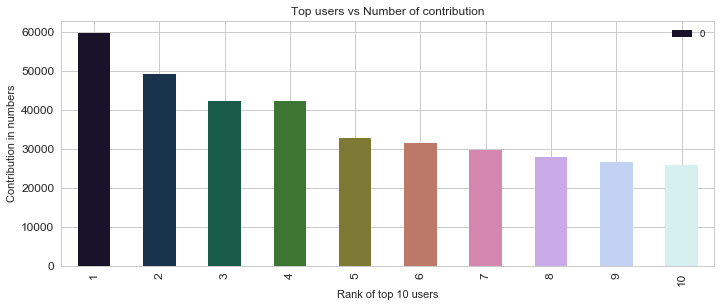

In [119]:
topUsers = pd.DataFrame([59892,49201,42272,42230,32815,31554,29686,27797,26736,25827],
                       index= ['1', '2', '3', '4','5','6','7','8','9','10'])

a4_dims = (11.7, 4.5)
topUsers.plot(kind = 'bar',title = 'Top users vs Number of contribution',
             color=sns.color_palette("cubehelix", 10),figsize=a4_dims,fontsize = 12 )
plt.ylabel('Contribution in numbers')
plt.xlabel('Rank of top 10 users')

### Number of user with least contribution  

```mysql
SELECT count(*) 
FROM
(SELECT user, count(*)
FROM 
(SELECT user FROM nodes UNION ALL SELECT user FROM ways)
GROUP BY user
HAVING count(*) = 1);
```
> 427

Out of 1487 unique users 427 made just one contribution to the dataset. This indicates that contibution is highly skewed towards the users with larger number of contribution. Generally,  a large number of less active users contribute corrections and small additions to the map.

Top 10 users combinedly make 32% of total contribution to the map.

## Exploring Information from the dataset
-------

**Amenities**

The following query finds out the top 20 amenities in the city. The result shows that *place_of_worship* tops the list and restaurant, banks, schools etc are the one that follows it.

``` mysql
SELECT value, count(value)
FROM(SELECT value FROM nodes_tags WHERE key = "amenity" UNION ALL SELECT value FROM ways_tags WHERE key = "amenity")
GROUP BY value 
ORDER BY count(value)DESC 
LIMIT 20; 

```
> 1. place_of_worship || 434 <br>
> 2. restaurant       || 385<br>
> 3. bank             || 278<br>
> 4. school           || 277<br>
> 5. hospital         || 172<br>
> 6. cafe             || 134<br>
> 7. atm              || 116<br>
> 8. bus_station      || 116<br>
> 9. parking          || 113<br>
> 10. fast_food        || 107<br>
> 11. fuel             || 104<br>
> 12. toilets          || 90<br>
> 13. college          || 85<br>
> 14. police           || 76<br>
> 15. pharmacy         || 66<br>
> 16. cinema           || 63<br>
> 17. swimming_pool    || 55<br>
> 18. post_office      || 46<br>
> 19. clinic           || 40<br>
> 20. marketplace      || 37<br>



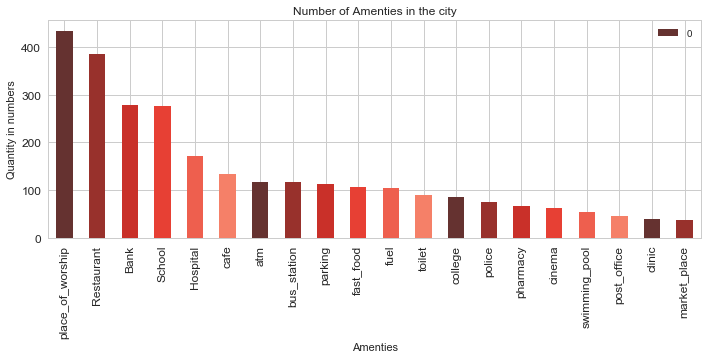

In [118]:
tourism = pd.DataFrame([434,385,278,277,172,134,116,116,113,107,104,90,85,76,66,63,55,46,40,37],
                       index= ['place_of_worship', 'Restaurant', 'Bank', 'School','Hospital', 'cafe','atm',
                               'bus_station','parking','fast_food','fuel','toilet','college','police','pharmacy',
                               'cinema','swimming_pool','post_office','clinic','market_place'])

a4_dims = (11.7, 4)
tourism.plot(kind = 'bar',title = 'Number of Amenties in the city', color=sns.color_palette("Reds_d"),
             figsize=a4_dims,fontsize = 12 )
plt.xlabel('Amenties')
plt.ylabel('Quantity in numbers')

**Popular kinds of places that attract tourism tourism **

The following query find what are the top 10 kinds of places which are affected by tourism. This list includes, hotels, place of attraction, artwork, viewpoints etc.
```mysql
SELECT value, count(value) 
FROM(SELECT key, value FROM nodes_tags where key = "tourism" UNION ALL SELECT key, value FROM ways_tags where key ="tourism") GROUP BY value
ORDER BY count(value) DESC
LIMIT 10;
```

> hotel       || 215<br>
> attraction || 70 <br>
>  hostel || 37<br>
>  guest_house || 26<br>
>  artwork || 7<br>
> museum || 7<br>
> information || 6<br>
>  viewpoint || 6<br>
>  theme_park || 4<br>
>  camp_site || 3<br>

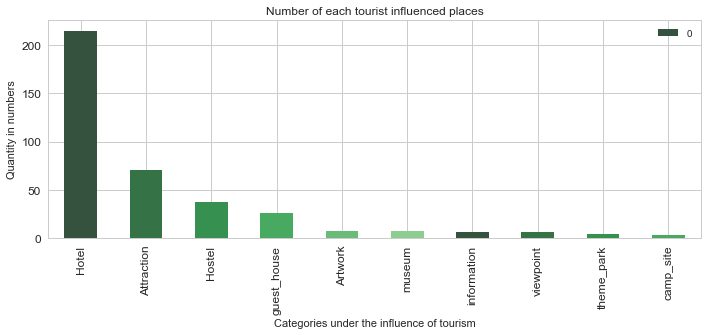

In [117]:

tourism = pd.DataFrame([215,70,37,26,7,7,6,6,4,3],index= ['Hotel', 'Attraction', 'Hostel', 'guest_house','Artwork', 
    'museum','information','viewpoint','theme_park','camp_site'])

a4_dims = (11.7, 4)
tourism.plot(kind = 'bar',title = 'Number of each tourist influenced places',
             color=sns.color_palette("Greens_d"), figsize=a4_dims,fontsize = 12 )

plt.xlabel('Categories under the influence of tourism')
plt.ylabel('Quantity in numbers')

**Transportation**

The following query explains the transportation system of the city. It counts the number of aeroways, highways, waterways, bridge and railways.

Although, there is a limitation of this count, that it only includes the attribute values which are of major importance.

For example: Considering **highways**, *trunk* is the most important roads in a country's system that aren't motorways. *Primary(link larger towns), secondary(link town), tertiary(link small towns and village)* are the next important roads in a country's system in succession.

Other less important roads are footway, cyclepaths, lane etc are not included in this count.

Similarly,the count of railways, waterway, bridge, aeroway includes the most important attribute values.

```mysql
SELECT key, count(key)
FROM
(SELECT * FROM ways_tags union select * FROM nodes_tags)WHERE 
key = "highway" and value in ("trunk", "road", "primary", "secondary", "tertiary")OR
key = "railway" and value in ("rail", "subway", "tram") OR
key ="waterway" and value in ("river","riverbank", "canal", "drain", "dam") OR
key = "bridge" and value in ("aqueduct", "covered", "trestle", "viaduct")OR
key="aeroway" and value = "aerodrome"
GROUP BY key 
ORDER BY count(key);
```
> aeroway || 2 <br>
  bridge || 36 <br>
  waterway || 300<br>
  railway || 651<br>
  highway || 2909<br>
  


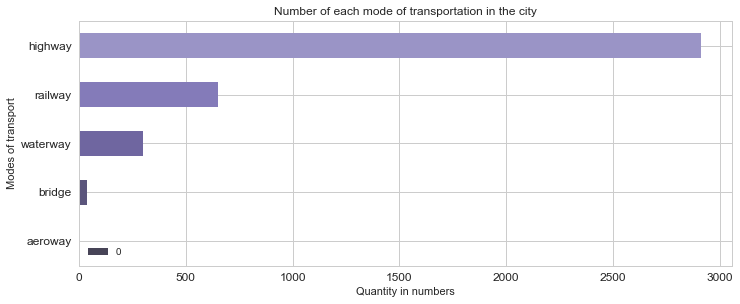

In [116]:
transport = pd.DataFrame([2,36,300,651,2909],index= ['aeroway', 'bridge', 'waterway', 'railway','highway'])

#plt.bar(tourism, title = 'Number of tourist influenced places', color=sns.color_palette("Blues"))
a4_dims = (11.7, 4.5)
transport.plot(kind = 'barh',title = 'Number of each mode of transportation in the city',
             color=sns.color_palette("Purples_d"),figsize=a4_dims,fontsize = 12 )
plt.ylabel('Modes of transport')
plt.xlabel('Quantity in numbers')

**Natural heritage**

The following query finds brings about the natural property of the city. It has alot of trees, wetland, grasslands, woods, coastlines etc.

```mysql
SELECT value, count(value)
 FROM 
(SELECT * FROM nodes_tags UNION ALL SELECT * FROM ways_tags) 
GROUP BY value HAVING key = "natural";
```

 > bare_rock || 4<br>
 > bay || 1<br>
 > beach || 11<br>
 > cape ||  1<br>
 > cave_entrance || 1<br>
 > cliff || 7<br>
 > coastline || 66<br>
 > grassland || 57<br>
 > mud || 5<br>
 > peak || 9<br>
 > scrub || 13<br>
 > spring || 1<br>
 > tree || 2578<br>
 > water || 159<br>
 > wetland || 92<br>
 > wood || 57<br>


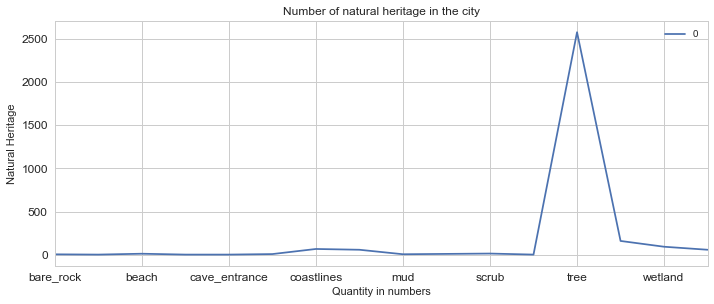

In [115]:
nature= pd.DataFrame([4,1,11,1,1,7,66,57,5,9,13,1,2578,159,92,57],
                       index= ['bare_rock', 'bay', 'beach', 'cape','cave_entrance','cliff','coastlines',
                               'grassland','mud','peak','scrub','spring','tree','water','wetland','wood'])


a4_dims = (11.7, 4.5)
nature.plot(kind = 'line',title = 'Number of natural heritage in the city', figsize=a4_dims, fontsize = 12 )
plt.ylabel('Natural Heritage')
plt.xlabel('Quantity in numbers')

**Popular Religions**

The five most popular religion in the city are turned out to be Hinduism, Islam, Christianity, Buddhism and Jainism.
The number depicts the number of place_of_worship for each religion.

``` mysql

SELECT value, count(value)
FROM
(SELECT value FROM nodes_tags WHERE key = "religion" UNION ALL SELECT value FROM ways_tags where key = "religion")
GROUP BY value
ORDER BY count(value) DESC
LIMIT 5);

```

> hindu || 135<br>
> muslim  || 105<br>
> christian  ||  69<br>
> buddhist   || 19<br>
> jain  || 11<br>

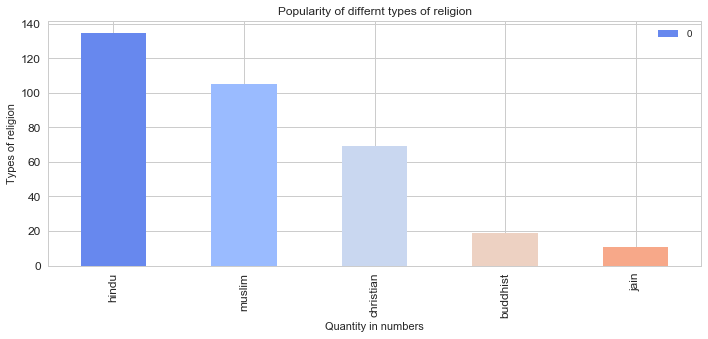

In [114]:
religion = pd.DataFrame([135,105,69,19,11],index= ['hindu', 'muslim', 'christian', 'buddhist','jain'])

#plt.bar(tourism, title = 'Number of tourist influenced places', color=sns.color_palette("Blues"))
a4_dims = (11.7, 4.5)
religion.plot(kind = 'bar',title = 'Popularity of differnt types of religion', color=sns.color_palette("coolwarm"),
              figsize=a4_dims, fontsize = 12)
plt.ylabel('Types of religion')
plt.xlabel('Quantity in numbers')

## Other ideas about the dataset
----

A **way** contains nodes between 2 to 2000 in numbers. 
Although, a **way** which containes zero or only one node is a **faulty way**.
It is found that this dataset contains 83 faulty ways.

``` mysql
SELECT count(*) FROM
(SELECT id, count(position) from ways_nodes GROUP BY id HAVING count(position) = 1);
```
> 83

It is required to come up with a solution to deal with faulty ways. However, this problem can be corrected manually and not programmetically.

**Suggested Solutions**

> 1. Google maps is supported and can be invoked with OSM tiles. There is a fair chance that we can use Google APIs to deal with faulty ways.

> 2. Geographic Information System(GIS) is a critical component in preparing and validating map dataset. There exist a GeoComm system that has a systematic process in place that assist in improving data.

**Benefits**
> Better identification of ways or locations.

> Improves the accuracy of the dataset.

> Minimum number of misleading paths, thus providing security, because maps are used for leading in right direction.

> We may get additional useful information about the way or location.

> Improved goodwill for providing reliable guidance.

**Anticipated Problems in implementing the improvement**

> Requirement of an improvement plan.

> Requirement of experience and expertise having in-depth knowledge in GIS.

> Need to review the existing data schema and models.

> Need of data coodination so that the integrity of the dataset is not violated.

## Conclusion
-----------
The analysis of this dataset gives the true sense of data wrangling. This dataset is bound to have dirty data because of it is human entered. Although, this can be a  perfect dataset to explore the art of data wrangling but sometimes it renders it impossible to clean every problem. 

This dataset has been extracted using custom method from openstreetmap.org.  It’s obvious that the Mumbai area is incomplete, though I believe it has been well cleaned for the purposes of this project.


## References
------

I refered the following links which helped me a lot in completing this project.

[Udacity discussion forum](https://discussions.udacity.com/c/nd002-data-wrangling)<br>
[Stackoverflow](www.stackoverflow.com)<br>
[ISO codes for different natural languages](http://www.science.co.il/language/Codes.php) <br>
[Verified Mumbai_City Postcodes](http://www.geopostcodes.com/Mumbai_City)<br>
[Mapzen extract](https://mapzen.com/data/metro-extracts/)<br>
[Git hub repository for sample-project](https://gist.github.com/carlward/54ec1c91b62a5f911c42#file-sample_project-md)<br>
[Git hub repository for database schema](https://gist.github.com/swwelch/f1144229848b407e0a5d13fcb7fbbd6f)<br>
[OSM Wikipedia](https://en.wikipedia.org/wiki/OpenStreetMap)<br>
[Markdown Cheetsheet](http://datascience.ibm.com/blog/markdown-for-jupyter-notebooks-cheatsheet/)

In [107]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# code to display the markdowm in a highlighted manner
from IPython.display import HTML
HTML('''<style>
.rendered_html pre, 
.rendered_html code{
background-color:#cce6ff;
padding: 4px;
}</style>
''')